In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r"D:\Data Science\science\Project\Flight_Price_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
x = df.drop(columns=['flight', 'price'])
y = df['price']

In [ ]:
x = pd.get_dummies(data=x, columns=['airline','source_city','departure_time','stops',
'arrival_time','destination_city','class'], drop_first=True)

In [7]:
x.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_predict = lr.predict(x_test)
y_predict

array([11094.68421403, 52318.61808515,  -251.6578675 , ...,
        8398.96361592,  7291.02000205,   -98.56613793])

In [33]:
lr.predict([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

c:\Users\Shashank\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15493.19938068])

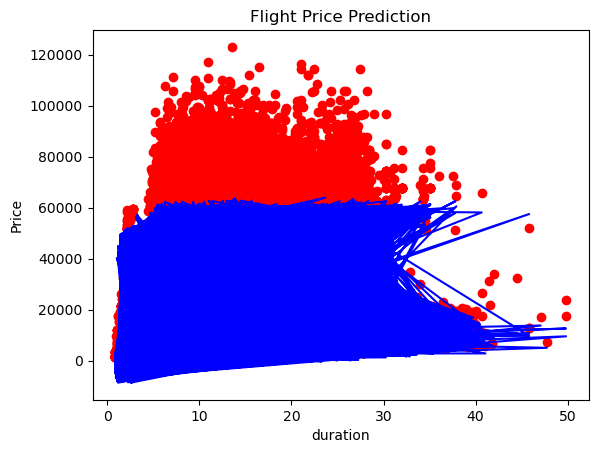

In [37]:
# Select a single feature for visualization (e.g., 'duration')
feature = 'duration'
plt.scatter(x_train[feature], y_train, color='red')
plt.plot(x_train[feature], lr.predict(x_train), color='blue')
plt.title('Flight Price Prediction')
plt.xlabel(feature)
plt.ylabel('Price')
plt.show()

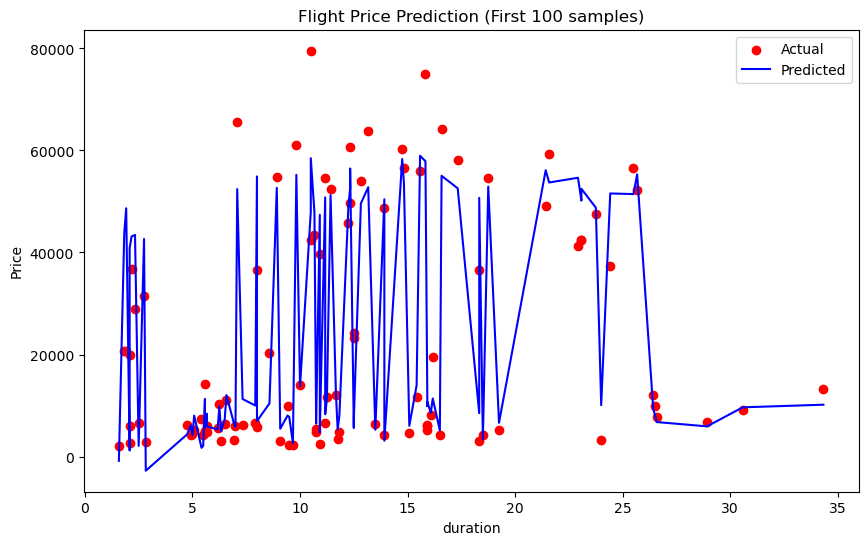

In [48]:
feature = 'duration'
N = 100  # Show first N samples

# Create a sorted subset
subset = x_train.head(N).sort_values(feature)
x_subset = subset[feature]
y_subset = y_train.loc[subset.index]

plt.figure(figsize=(10,6))
plt.scatter(x_subset, y_subset, color='red', label='Actual')
plt.plot(x_subset, lr.predict(subset), color='blue', label='Predicted')
plt.title(f'Flight Price Prediction (First {N} samples)')
plt.xlabel(feature)
plt.ylabel('Price')
plt.legend()
plt.show()